# Multiclass classification using Neural network (clothes classification)

* When you have more than two classes as an option, this is known as multiclass classification.


In [2]:
# importing the dataset
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

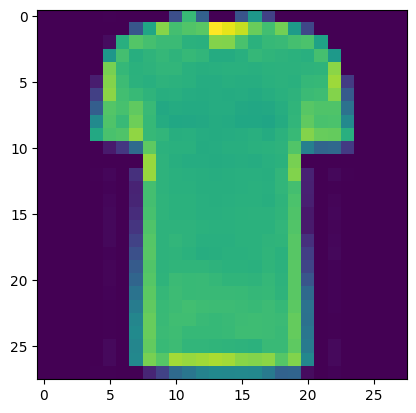

In [5]:
# Plot a single example

import matplotlib.pyplot as plt
import random
R = random.randint(0,60000) # random value up to 60000 because we have 60000 training sample
plt.imshow(train_data[R])

In [6]:
# Check our samples label
train_labels[0]

9

* It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.
* Let's create a small list of the class names. you can find them on [github](https://github.com/zalandoresearch/fashion-mnist#labels)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

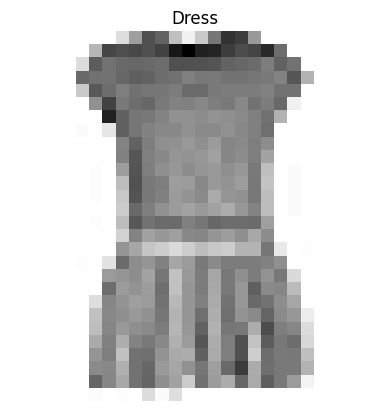

In [8]:
# Plot an example image and its label
plt.imshow(train_data[3], cmap=plt.cm.binary)
plt.title(class_names[train_labels[3]])
plt.axis(False);

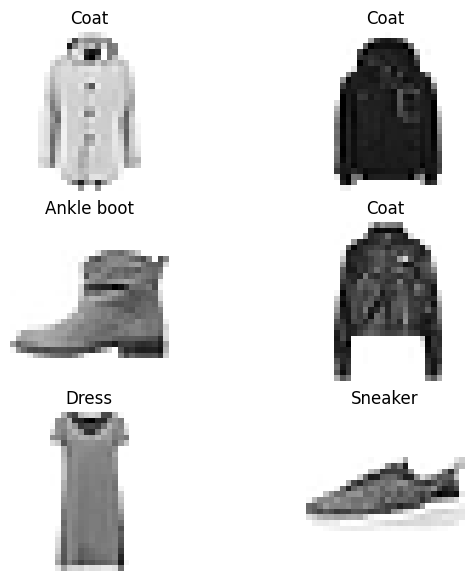

In [9]:
# Plot multiple random images of fashion MNIST
plt.figure(figsize=(7,7))
for i in range(6):
    plt.subplot(3,2,i+1)
    random_index = random.randint(0,6000)
    plt.imshow(train_data[random_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[random_index]])
    plt.axis(False);

## Alright, let's build a model to figure out the relationship between the pixel values and their labels.



In [10]:
# set random seed
tf.random.set_seed(42)

# create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')]
)

# compile the model
model_1.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# fit the model

history_1 = model_1.fit(train_data,
                        train_labels,
                        epochs=10,
                        validation_data=(test_data,test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1369 - loss: 2.8810 - val_accuracy: 0.1665 - val_loss: 2.1289
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1807 - loss: 2.0658 - val_accuracy: 0.1971 - val_loss: 1.8703
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.2232 - loss: 1.8147 - val_accuracy: 0.2606 - val_loss: 1.7324
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2527 - loss: 1.7203 - val_accuracy: 0.2915 - val_loss: 1.6706
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2749 - loss: 1.6814 - val_accuracy: 0.2968 - val_loss: 1.6427
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2830 - loss: 1.6522 - val_accuracy: 0.2856 - val_loss: 1.6229
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2867 - loss: 1.6286 - val_accuracy: 0.3131 - val_loss: 1.6183
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2887 - loss: 1.6219 - 

In [11]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

Alright, our model gets to about ~38% accuracy after 10 epoch

> Ajouter une citation


Which is better than guessing (guessing with 10 classes would result in about 10% accuracy) but we can do better.

In [15]:
# let's check the minimum and maximum values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

We can get these values between 0 and 1 by dividing the entire array by the maximum: 255.0 (dividing by a float also converts to a float).

Doing so will result in all of our data being between 0 and 1 (known as **scaling** or **normalization**).

In [13]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data/255
test_data = test_data /255

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

Beautiful! Now our data is between 0 and 1. Let's see what happens when we model it.

We'll use the same model as before (model_1) except this time the data will be normalized.

In [16]:
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')]
)

# compile the model
model_2.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# fit the model

history_2 = model_2.fit(train_data,
                        train_labels,
                        epochs=10,
                        validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4100 - loss: 1.4857 - val_accuracy: 0.6953 - val_loss: 0.8614
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7200 - loss: 0.8091 - val_accuracy: 0.7436 - val_loss: 0.7363
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7539 - loss: 0.7064 - val_accuracy: 0.7591 - val_loss: 0.6966
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7666 - loss: 0.6702 - val_accuracy: 0.7672 - val_loss: 0.6753
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7733 - loss: 0.6494 - val_accuracy: 0.7698 - val_loss: 0.6635
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7763 - loss: 0.6360 - val_accuracy: 0.7729 - val_loss: 0.6555
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7781 - loss: 0.6271 - val_accuracy: 0.7752 - val_loss: 0.6501
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7792 - loss: 0.6204 - 

Woah, we used the exact same model as before but we with normalized data we're now seeing a much higher accuracy value!

Let's plot each model's history (their loss curves).

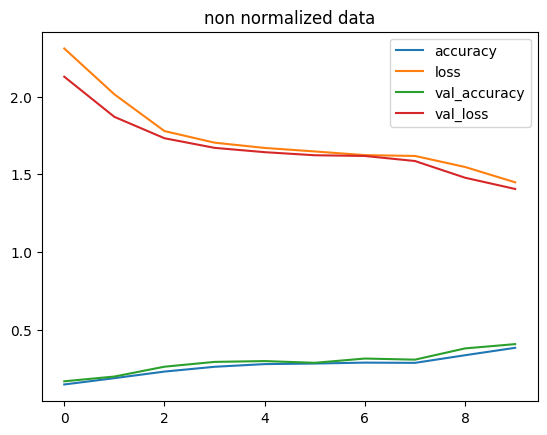

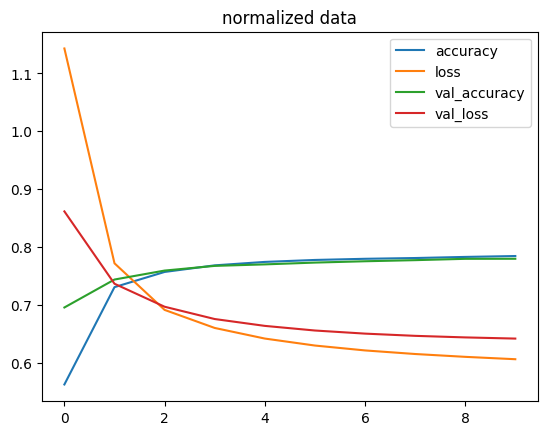

In [23]:
import pandas as pd

# Plot non-normalized data loss curves
pd.DataFrame(history_1.history).plot(title='non normalized data')

# Plot normalized data loss curves
pd.DataFrame(history_2.history).plot(title='normalized data');

Wow. From these two plots, we can see how much quicker our model with the normalized data (model_2) improved than the model with the non-normalized data (model_1).

In [28]:
# the goal now is to find the ideal learning rate for our model

tf.random.set_seed

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_3.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

history_3 = model_3.fit(train_data,
                        train_labels,
                        epochs=50,
                        callbacks=[lr_scheduler],
                        validation_data=(test_data,test_labels)
                        )

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4671 - loss: 1.5132 - val_accuracy: 0.7620 - val_loss: 0.7199 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7759 - loss: 0.6653 - val_accuracy: 0.7900 - val_loss: 0.6045 - learning_rate: 0.0011
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7977 - loss: 0.5893 - val_accuracy: 0.7979 - val_loss: 0.5808 - learning_rate: 0.0013
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8054 - loss: 0.5636 - val_accuracy: 0.8014 - val_loss: 0.5683 - learning_rate: 0.0014
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8088 - loss: 0.5491 - val_accuracy: 0.8038 - val_loss: 0.5607 - learning_rate: 0.0016
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8117 - loss: 0.5399 - val_accuracy: 0.8067 - val_loss: 0.5566 - learning_rate: 0.0018
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8126 - l

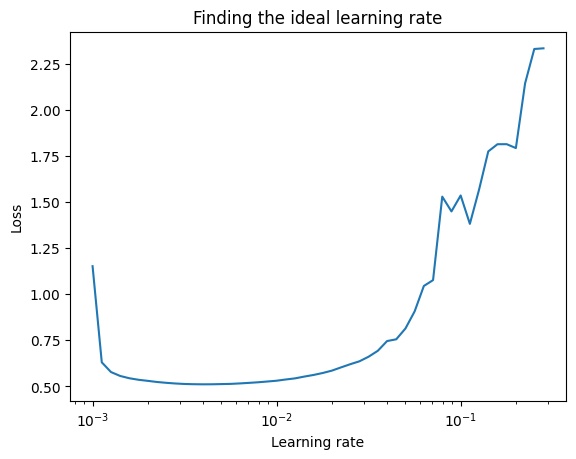

In [35]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3*(10**(np.arange(50)/20))

plt.semilogx(lrs, history_3.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In this case, it looks like somewhere close to the default learning rate of the Adam optimizer (0.001) is the ideal learning rate.

Let's refit a model using the ideal learning rate.

In [34]:
tf.random.set_seed

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_4.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history_4 = model_4.fit(train_data,
                        train_labels,
                        epochs=20,
                        validation_data=(test_data,test_labels)
                        )

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3608 - loss: 1.6990 - val_accuracy: 0.6977 - val_loss: 0.8729
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7341 - loss: 0.7750 - val_accuracy: 0.7705 - val_loss: 0.6741
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7794 - loss: 0.6316 - val_accuracy: 0.7902 - val_loss: 0.6146
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8000 - loss: 0.5787 - val_accuracy: 0.7956 - val_loss: 0.5907
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8091 - loss: 0.5521 - val_accuracy: 0.7998 - val_loss: 0.5744
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8131 - loss: 0.5366 - val_accuracy: 0.8032 - val_loss: 0.5648
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8163 - loss: 0.5259 - val_accuracy: 0.8048 - val_loss: 0.5590
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8193 - loss: 0.5177 - 

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:

* Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.

In [36]:
# make predictions wit the recent model
y_prob = model_4.predict(test_data)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.30900168e-09, 3.39663432e-12, 2.23591436e-12, ...,
        9.73508507e-02, 6.43366855e-03, 6.32968187e-01],
       [3.92774309e-05, 3.76423050e-05, 9.11439657e-01, ...,
        2.75499418e-20, 5.58914689e-06, 2.26856765e-19],
       [1.79389815e-07, 9.99527156e-01, 1.03895021e-04, ...,
        1.06637095e-10, 1.28815162e-11, 1.67052878e-18],
       ...,
       [1.55895751e-03, 3.79165677e-08, 8.48724085e-05, ...,
        3.06626973e-08, 9.75291193e-01, 4.52821814e-06],
       [5.39039593e-06, 9.96623993e-01, 1.23443810e-04, ...,
        1.68159588e-07, 3.48305662e-10, 1.99600044e-14],
       [7.63958326e-07, 2.55796976e-06, 3.07063971e-07, ...,
        1.04958918e-02, 1.45743126e-02, 4.68455662e-04]], dtype=float32)

Our model outputs a list of prediction probabilities, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the argmax() method.

In [37]:
# See the predicted class number and label for the first example
y_prob[0].argmax(), class_names[y_prob[0].argmax()]

(9, 'Ankle boot')

In [38]:
# Convert all of the predictions from probabilities to labels
y_preds = y_prob.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [40]:
# check out the confusion matrix
from sklearn.metrics import confusion_matrix
c_m=confusion_matrix(test_labels,y_preds)
c_m

array([[762,  11,  33,  69,   2,   2, 110,   0,  11,   0],
       [  3, 947,  12,  34,   2,   0,   1,   0,   1,   0],
       [ 28,   5, 726,   7, 133,   0, 100,   0,   1,   0],
       [ 51,  27,  19, 810,  46,   0,  39,   0,   8,   0],
       [  1,   3, 156,  31, 712,   0,  94,   0,   3,   0],
       [  2,   0,   0,   1,   0, 926,   0,  43,   3,  25],
       [153,   4, 142,  46, 101,   0, 541,   0,  13,   0],
       [  0,   0,   0,   0,   0,  46,   0, 928,   0,  26],
       [  4,   1,   2,   9,   4,  10,  69,   5, 894,   2],
       [  2,   0,   0,   0,   0,  22,   0,  51,   0, 925]])

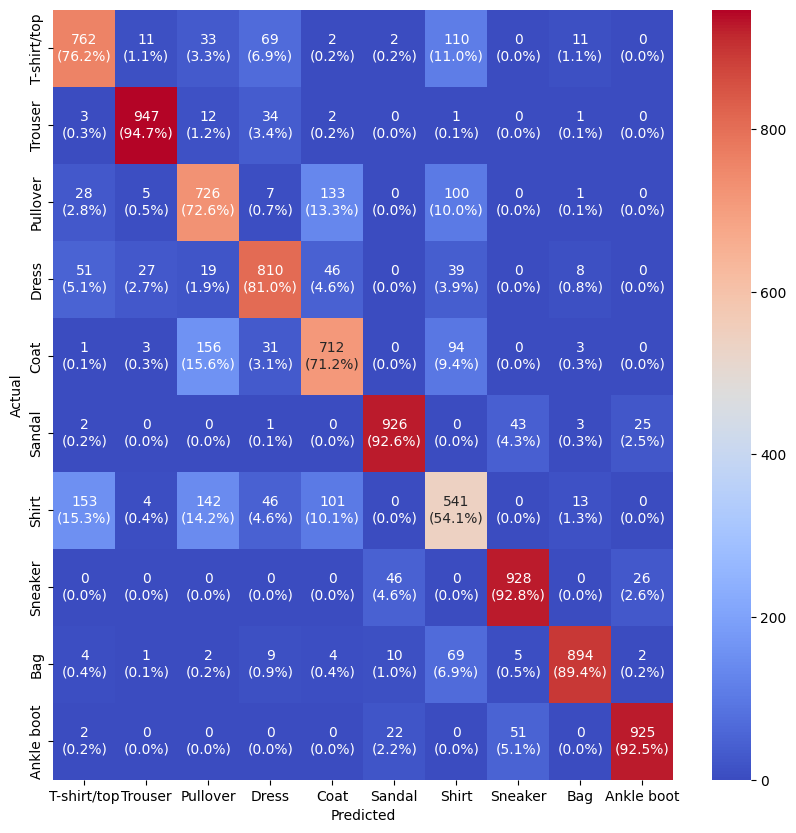

In [53]:
import seaborn as sns
plt.figure(figsize=(10,10))

c_m_percent = c_m / c_m.sum(axis=1, keepdims=True) * 100

# Create custom annotations with counts and percentages
annotations = np.empty_like(c_m).astype(str)
for i in range(c_m.shape[0]):
    for j in range(c_m.shape[1]):
        annotations[i, j] = f'{c_m[i, j]}\n({c_m_percent[i, j]:.1f}%)'


sns.heatmap(c_m,annot=annotations,fmt='',cmap='coolwarm',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual');

It looks like our model is getting confused between the Shirt and T-shirt/top classes (e.g. predicting Shirt when it's actually a T-shirt/top).

### Let's create a function to plot a random image along with its prediction.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


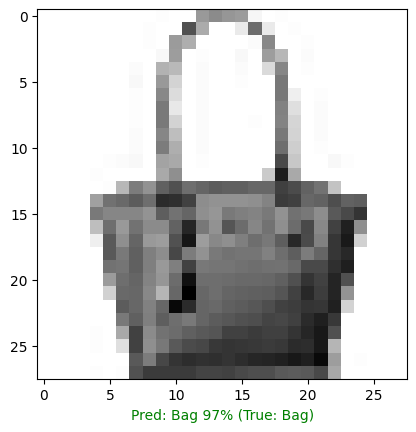

In [57]:
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.
  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`."""
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

# Check out a random image as well as its prediction
plot_random_image(model=model_4,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

After running the cell above a few times you'll start to get a visual understanding of the relationship between the model's predictions and the true labels.

Did you figure out which predictions the model gets confused on?

It seems to mix up classes which are similar, for example, Sneaker with Ankle boot.

Looking at the images, you can see how this might be the case.

The overall shape of a Sneaker and an Ankle Boot are similar.

The overall shape might be one of the patterns the model has learned and so therefore when two images have a similar shape, their predictions get mixed up.